# My attempt to make a stacked bar chart of total number of Non-western mentions over the years vs. 
# total number of western mentions over the years. 
1. Ended up using Tableau to visualize the data. 
2. Need to normalize the data to represent the proportions. 

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [134]:
filename = '/Users/jeanettepyne/Desktop/Illinois_reboot_python_2.0/Data/country_data_split.xlsx'

In [135]:
df = pd.read_excel(filename, index_col = False)

In [136]:
df.head()

,Unnamed: 0,Title,Description_clean,Year,Month,Duration_min,Type,title_gpe_mentioned,description_gpe_mentioned,Single_Multiple,Country,Region,Global South_North,Classification
0,0,"Women’s March on Pretoria, 1956",This 1956 march was a protest against pass law...,2022,3,34,Regular,"[['Pretoria', 'GPE']]","[['South Africa’s', 'GPE'], ['South Africa', '...",Single,South Africa,Eastern and Southern Africa,Global South,Non-western
1,1,"Thomas Hardy, Emma Gifford and Florence Dugdale","Once you know about Hardy’s life, it's natural...",2022,3,39,Regular,[],"[['Angelique', 'GPE']]",NaN,NaN,NaN,NaN,NaN
2,2,SYMHC Classics: 6888th Central Postal Director...,This 2019 episode covers the 6888th Central Po...,2022,3,34,SYMHC Classics:,[],"[['U.S.', 'GPE']]",Single,United States,North America,Global North,Western
3,3,Behind the Scenes Minis: Maria and Bruno,Tracy shares how she learned about Maria Gertr...,2022,3,19,Behind the Scenes Minis:,[],[],NaN,NaN,NaN,NaN,NaN
4,4,Giordano Bruno,"Bruno was a mathematician, philosopher, astron...",2022,3,40,Regular,[],"[['Italy', 'GPE'], ['Martinez', 'GPE']]",Single,Italy,Western Europe,Global North,Western


In [137]:
field = ['Title', 'Type', 'Year', 'Month','Country','Region', 'Classification']

In [138]:
df_country = pd.DataFrame(df, columns = field)

In [139]:
df_country.head()

,Title,Type,Year,Month,Country,Region,Classification
0,"Women’s March on Pretoria, 1956",Regular,2022,3,South Africa,Eastern and Southern Africa,Non-western
1,"Thomas Hardy, Emma Gifford and Florence Dugdale",Regular,2022,3,NaN,NaN,NaN
2,SYMHC Classics: 6888th Central Postal Director...,SYMHC Classics:,2022,3,United States,North America,Western
3,Behind the Scenes Minis: Maria and Bruno,Behind the Scenes Minis:,2022,3,NaN,NaN,NaN
4,Giordano Bruno,Regular,2022,3,Italy,Western Europe,Western


In [140]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1899 non-null   object
 1   Type            1899 non-null   object
 2   Year            1899 non-null   int64 
 3   Month           1899 non-null   int64 
 4   Country         758 non-null    object
 5   Region          758 non-null    object
 6   Classification  758 non-null    object
dtypes: int64(2), object(5)
memory usage: 104.0+ KB


In [141]:
df_country['Year'] = df_country['Year'].astype(str)

In [142]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1899 non-null   object
 1   Type            1899 non-null   object
 2   Year            1899 non-null   object
 3   Month           1899 non-null   int64 
 4   Country         758 non-null    object
 5   Region          758 non-null    object
 6   Classification  758 non-null    object
dtypes: int64(1), object(6)
memory usage: 104.0+ KB


In [143]:
df_country['Month'] = df_country['Month'].astype(str)

In [144]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1899 non-null   object
 1   Type            1899 non-null   object
 2   Year            1899 non-null   object
 3   Month           1899 non-null   object
 4   Country         758 non-null    object
 5   Region          758 non-null    object
 6   Classification  758 non-null    object
dtypes: object(7)
memory usage: 104.0+ KB


In [152]:
date = pd.to_datetime(df_country['Year'], format = '%Y')

In [153]:
#date = pd.to_datetime(df_country['Year'] + '-' + df_country['Month'], format = '%Y-%m')

In [154]:
df_country['Date'] = date

In [155]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           1899 non-null   object        
 1   Type            1899 non-null   object        
 2   Year            1899 non-null   object        
 3   Month           1899 non-null   object        
 4   Country         758 non-null    object        
 5   Region          758 non-null    object        
 6   Classification  758 non-null    object        
 7   Date            1899 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 118.8+ KB


In [157]:
df_country['Date'] =  pd.DatetimeIndex(df_country['Year']).year

In [158]:
df_country.sample(n=5)

,Title,Type,Year,Month,Country,Region,Classification,Date
746,SYMHC Classics: The Johnstown Flood,SYMHC Classics:,2018,7,United States,North America,Western,2018
1135,Child Migrant Program,Regular,2015,7,Canada,North America,Western,2015
923,Louis Riel,Regular,2017,6,Canada,North America,Western,2017
841,Unearthed!: The USS Indianapolis,Unearthed!,2017,12,NaN,NaN,NaN,2017
551,SYMHC Live: Mysteries of the Color Blue,Regular,2019,10,NaN,NaN,NaN,2019


In [159]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1899 non-null   object
 1   Type            1899 non-null   object
 2   Year            1899 non-null   object
 3   Month           1899 non-null   object
 4   Country         758 non-null    object
 5   Region          758 non-null    object
 6   Classification  758 non-null    object
 7   Date            1899 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 118.8+ KB


In [161]:
df_country['Date'].value_counts()

2020    239
2021    215
2019    167
2018    164
2017    132
2015    113
2016    110
2014    110
2010    110
2013    107
2012    107
2011    106
2009    105
2008     59
2022     55
Name: Date, dtype: int64

In [162]:
country_regular = df_country[df_country['Type']=='Regular']

In [163]:
country_regular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1898
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1467 non-null   object
 1   Type            1467 non-null   object
 2   Year            1467 non-null   object
 3   Month           1467 non-null   object
 4   Country         642 non-null    object
 5   Region          642 non-null    object
 6   Classification  642 non-null    object
 7   Date            1467 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 103.1+ KB


In [164]:
country_regular.head()

,Title,Type,Year,Month,Country,Region,Classification,Date
0,"Women’s March on Pretoria, 1956",Regular,2022,3,South Africa,Eastern and Southern Africa,Non-western,2022
1,"Thomas Hardy, Emma Gifford and Florence Dugdale",Regular,2022,3,NaN,NaN,NaN,2022
4,Giordano Bruno,Regular,2022,3,Italy,Western Europe,Western,2022
5,"Maria Gertrudis Barceló, Santa Fe’s Gambling Q...",Regular,2022,3,Mexico,Latin America and Caribbean,Non-western,2022
6,"Maria Gertrudis Barceló, Santa Fe’s Gambling Q...",Regular,2022,3,United States,North America,Western,2022


In [165]:
country_regular['Classification'].value_counts()

Western        502
Non-western    140
Name: Classification, dtype: int64

In [123]:
country_regular['Year'].value_counts()

2020    119
2015    113
2010    110
2014    108
2012    107
2013    107
2011    106
2017    105
2016    105
2018    101
2019    101
2009     99
2021     99
2008     59
2022     28
Name: Year, dtype: int64

In [171]:
nw_ep = country_regular[country_regular['Classification']=='Non-western']

In [176]:
nw_ep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 1898
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           140 non-null    object
 1   Type            140 non-null    object
 2   Year            140 non-null    object
 3   Month           140 non-null    object
 4   Country         140 non-null    object
 5   Region          140 non-null    object
 6   Classification  140 non-null    object
 7   Date            140 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 9.8+ KB


In [167]:
#nw_ep = nw_ep.set_index('Date')

In [172]:
nw_ep.head()

,Title,Type,Year,Month,Country,Region,Classification,Date
0,"Women’s March on Pretoria, 1956",Regular,2022,3,South Africa,Eastern and Southern Africa,Non-western,2022
5,"Maria Gertrudis Barceló, Santa Fe’s Gambling Q...",Regular,2022,3,Mexico,Latin America and Caribbean,Non-western,2022
13,Holodomor,Regular,2022,3,Russian Federation,Eastern Europe and Central Asia,Non-western,2022
14,Holodomor,Regular,2022,3,Ukraine,Eastern Europe and Central Asia,Non-western,2022
23,The Nika Riots & Massacre,Regular,2022,2,Turkey,Eastern Europe and Central Asia,Non-western,2022


In [202]:
ep_ct = nw_ep['Date'].value_counts()
# this gives me number of non-western episodes per year

In [203]:
ep_ct

2010    16
2014    14
2013    13
2020    11
2015    11
2011    11
2008    10
2012     9
2019     8
2009     8
2018     7
2016     7
2022     6
2017     5
2021     4
Name: Date, dtype: int64

In [222]:
nw_episode_ct = pd.DataFrame(ep_ct)

In [223]:
nw_episode_ct = nw_episode_ct.sort_index()

,index,Date
0,2008,10
1,2009,8
2,2010,16
3,2011,11
4,2012,9
5,2013,13
6,2014,14
7,2015,11
8,2016,7
9,2017,5


In [238]:
nw_episode_ct.rename(columns = {"index": "Year", "Date": "Episode_Count"})

,Episode_Count
2008,10
2009,8
2010,16
2011,11
2012,9
2013,13
2014,14
2015,11
2016,7
2017,5


In [277]:
class_df = country_regular.groupby(by=['Year','Classification']).count()['Title']

In [274]:
class_df['Classification'] = class_df['Classification'].astype('category')

In [280]:
df_stacked = pd.DataFrame(class_df)

<AxesSubplot:xlabel='Year'>

<Figure size 1008x1008 with 0 Axes>

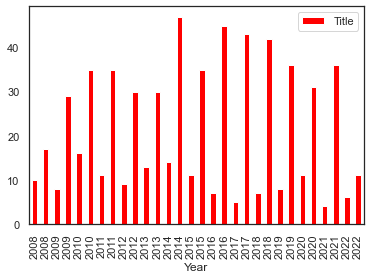

In [276]:
plt.figure(figsize=(14,14))
sns.set(style = 'white')

class_df.set_index('Year').plot(kind='bar',stacked=True, color=['red','skyblue'])


In [283]:
df_stacked.to_excel('stackedbar.xlsx')

<AxesSubplot:xlabel='Year,Classification'>

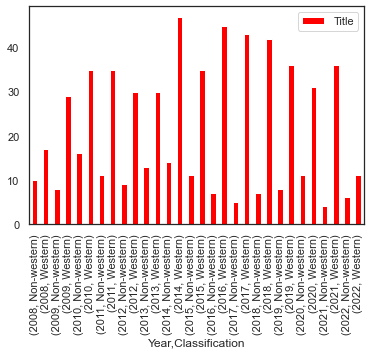

In [282]:
df_stacked.plot(kind='bar',stacked=True, color=['red','blue'])

western = 



# Number of Non-western Episodes each Year over the Years 

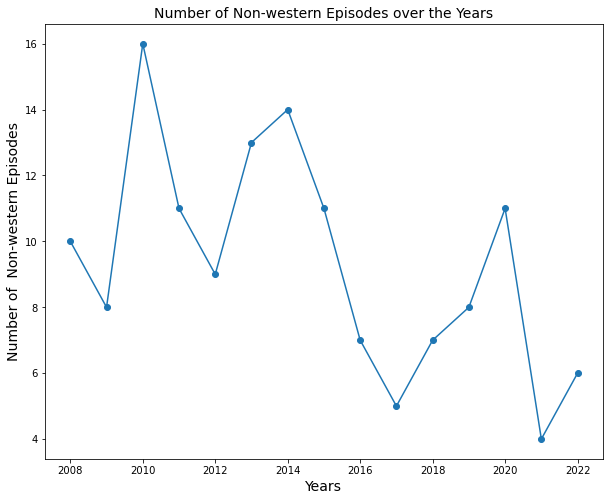

In [242]:
f,ax=plt.subplots(figsize=(10,8))
plt.plot(nw_episode_ct, marker = 'o')

'''
X = nw_episode_ct
z = np.polyfit(X, nw_episode_ct['Episode_Count'], 1) 
p = np.poly1d(z)
ax.plot(X,p(X),"r--")
ax.plot(X, nw_episode_ct['Episode_Count'])
'''

plt.xlabel("Years", fontsize=14)
plt.ylabel("Number of  Non-western Episodes", fontsize=14)
plt.title("Number of Non-western Episodes over the Years", fontsize=14)

plt.show()



In [211]:
nw_episode_ct.to_excel('non-western_count.xlsx')